As always, we import the necessary libraries to answer our questions and set a style for the graphs

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 2.0))

Let's create a dataframe containing the information in the csv file.

In [3]:
pokemon=pd.read_csv("../dataset/pokemon.csv")

<b>Let's begin!</b>

# Which pokémon is the most difficult to catch? 

In [10]:
pokemon['capture_rate']=pd.to_numeric(pokemon['capture_rate'])
pokemon['name'][pokemon['capture_rate']==min(pokemon['capture_rate'])]

143      Articuno
144        Zapdos
145       Moltres
149        Mewtwo
242        Raikou
243         Entei
244       Suicune
248         Lugia
249         Ho-Oh
373        Beldum
374        Metang
375     Metagross
376      Regirock
377        Regice
378     Registeel
379        Latias
380        Latios
381        Kyogre
382       Groudon
384       Jirachi
385        Deoxys
479          Uxie
480       Mesprit
481         Azelf
482        Dialga
483        Palkia
484       Heatran
485     Regigigas
486      Giratina
487     Cresselia
489       Manaphy
490       Darkrai
492        Arceus
493       Victini
637      Cobalion
638     Terrakion
639      Virizion
640      Tornadus
641     Thundurus
642      Reshiram
643        Zekrom
644      Landorus
645        Kyurem
646        Keldeo
647      Meloetta
648      Genesect
717       Zygarde
718       Diancie
719         Hoopa
720     Volcanion
771    Type: Null
772      Silvally
784     Tapu Koko
785     Tapu Lele
786     Tapu Bulu
787     Ta

The result was easily predictable: most legendary pokémon has the lowest catch rate.
For this reason I ask myself:

<b> Which no-legendary pokémon is the most diffucult to catch? </b>

In [11]:
no_legendary=pokemon[pokemon['is_legendary']==False]
no_legendary['name'][no_legendary['capture_rate']==min(no_legendary['capture_rate'])]

373        Beldum
374        Metang
375     Metagross
771    Type: Null
772      Silvally
Name: name, dtype: object

Considering that <em>type: null</em> is given to us by <em> Gladion </em> (or <em> Wicke </em>), we consecrate <code>beldum</code> as the most difficult pokémon to catch!

In [12]:
display(HTML("<img src='../img/beldum.png' width='200px' height='200px'>"))

rate=pokemon[pokemon['name']=='Beldum']['capture_rate'].values
beldum_rate=num = "{0:.2f}".format((rate[0]*100)/255)
print("Name: Beldum\n"+"Percentage of catch: " + beldum_rate + " %")

Name: Beldum
Percentage of catch: 1.18 %


# BEST AND WORST

For every basic stat. , Which pokémon has the highest value? Which pokémon has the lowest value?

<div class="alert alert-info">
The min value for attack/special-attack and defense/special-defense statistics was calculated from the subsets of the pokemon which have the highest physical/special statistic compared to the special/physical equivalent. In this way the results acquire greater relevance.
</div>

<b>Speed</b>

In [32]:
pokemon['name'][pokemon['speed']==max(pokemon['speed'])]

385    Deoxys
Name: name, dtype: object

In [33]:
pokemon['name'][pokemon['speed']==min(pokemon['speed'])]

212      Shuckle
445     Munchlax
770    Pyukumuku
Name: name, dtype: object

<b> Atk </b>

In [34]:
pokemon['name'][pokemon['attack']==max(pokemon['attack'])]

213    Heracross
Name: name, dtype: object

In [37]:
physical_atk=pokemon[pokemon['attack']>=pokemon['sp_attack']]
physical_atk['name'][physical_atk['attack']==min(physical_atk['attack'])]

212    Shuckle
Name: name, dtype: object

<b>Def</b>

In [38]:
pokemon['name'][pokemon['defense']==max(pokemon['defense'])]

207    Steelix
212    Shuckle
305     Aggron
Name: name, dtype: object

In [41]:
physical_def=pokemon[pokemon['defense']>=pokemon['sp_defense']]
physical_def['name'][physical_def['defense']==min(physical_def['defense'])]

317    Carvanha
Name: name, dtype: object

<b> Sp.Atk</b>

In [42]:
pokemon['name'][pokemon['sp_attack']==max(pokemon['sp_attack'])]

149    Mewtwo
Name: name, dtype: object

In [69]:
special_atk=pokemon[pokemon['sp_attack']>=pokemon['attack']]
special_atk['name'][special_atk['sp_attack']==min(special_atk['sp_attack'])]

212    Shuckle
Name: name, dtype: object

<b>Sp.Def</b>

In [44]:
pokemon['name'][pokemon['sp_defense']==max(pokemon['sp_defense'])]

212    Shuckle
Name: name, dtype: object

In [45]:
special_def=pokemon[pokemon['sp_defense']>=pokemon['defense']]
special_def['name'][special_def['sp_defense']==min(special_def['sp_defense'])]

173    Igglybuff
317     Carvanha
Name: name, dtype: object

<b>Hp</b>

In [46]:
pokemon['name'][pokemon['hp']==max(pokemon['hp'])]

241    Blissey
Name: name, dtype: object

In [47]:
pokemon['name'][pokemon['hp']==min(pokemon['hp'])]

291    Shedinja
Name: name, dtype: object

Combining all the information we can see how <code>Shuckle</code> is a pokémon with <b>very particular statistics</b>. Look at them:

In [68]:
display(HTML("<img src='../img/shuckle.png' width='200px' height='200px'>"))

pokemon.iloc[212][['name','hp','attack','sp_attack','defense','sp_defense','speed']]


name          Shuckle
hp                 20
attack             10
sp_attack          10
defense           230
sp_defense        230
speed               5
Name: 212, dtype: object

# Which type is the most common? 

To answer this question, I think it's more interesting seeing the <b>absolute frequencies</b> for each type of pokémon in a <b>bar chart</b>.

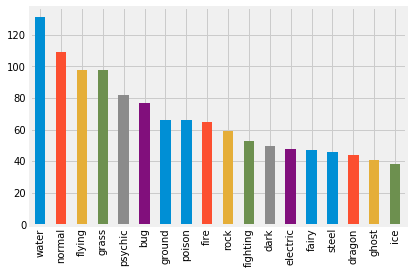

In [40]:
types_abs_freq=(pokemon['type1'].value_counts()+pokemon['type2'].value_counts()).sort_values(ascending=False)
x=types_abs_freq.index
y=types_abs_freq.values
types_abs_freq.plot.bar()
plt.show()

<div class="alert alert-info">
Absolute frequencies were calculated from a set constructed as the union between the set of types 1 and 2 of each pokémon.
</div>

The result obtained shows us a subdivision of the pokémon by type rather conform to reality: the pokémon closest to have an animal correspondent in the real world are the most widespread.<br>
<b>The most common type is water</b> but the most interesting data is that the psychic type is the fifth most common type, even exceeding the bug type.

# Which ability is the most common? 

We answer this question by printing the top 10 most common abilities.

In [195]:
ser_abilities=pokemon['abilities']
abilities=[]
for i in range(0,801):
    arr_ab=ser_abilities[i].split(',')
    for j in range(0,len(arr_ab)):
        ability=arr_ab[j].replace("[","").replace("'","").replace("]","")
        abilities.append(ability)
        
abilities_freq=pd.Series(abilities).value_counts().sort_values(ascending=False)
abilities_freq.head(10)

Levitate        32
Swift Swim      27
Chlorophyll     25
 Sheer Force    24
Keen Eye        24
Overgrow        21
Blaze           21
Torrent         21
 Inner Focus    21
 Sturdy         21
dtype: int64